<a href="https://colab.research.google.com/github/sri1axmi/AutoCogMetrics/blob/main/AutoCogMetrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of dataset:
   Reaction_Time  Memory_Score  Attention_Span  Stress_Level  Workload  \
0            324            99           40.08            10        96   
1            293            85            6.69             4        19   
2            332            67           29.61             6        94   
3            376            54           37.11             9        68   
4            288            95           41.54             3        69   

   Decision_Making_Score Cognitive_Level  
0                     61          Medium  
1                     71             Low  
2                     96          Medium  
3                     67             Low  
4                     92            High  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Reaction_Time          100000 non-nul

/tmp/ipython-input-2246196092.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cognitive_Level", data=df, palette="viridis")


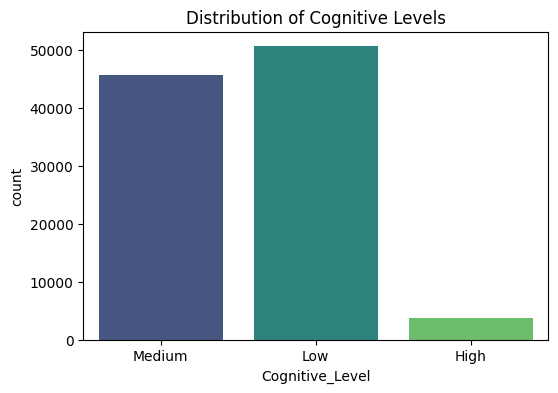

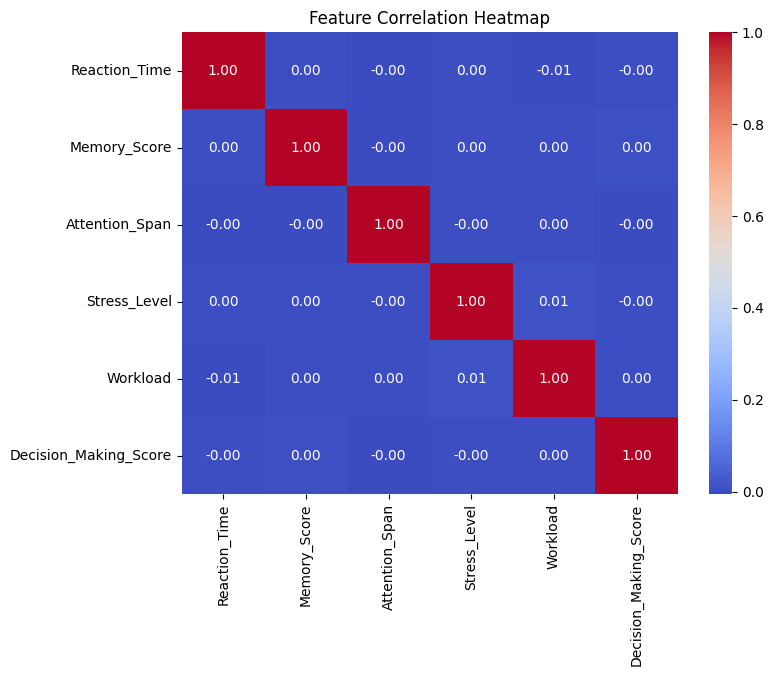


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       759
           1       0.99      0.99      0.99     10142
           2       0.98      0.98      0.98      9099

    accuracy                           0.98     20000
   macro avg       0.97      0.95      0.96     20000
weighted avg       0.98      0.98      0.98     20000

SVM Accuracy: 0.9840
SVM Precision: 0.9838
SVM Recall: 0.9840
SVM F1-score: 0.9839


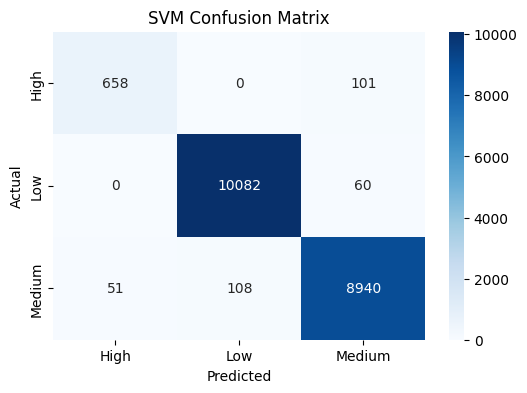

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8914 - loss: 0.2773 - val_accuracy: 0.9883 - val_loss: 0.0443
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9763 - loss: 0.0604 - val_accuracy: 0.9934 - val_loss: 0.0271
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9824 - loss: 0.0439 - val_accuracy: 0.9931 - val_loss: 0.0196
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9848 - loss: 0.0365 - val_accuracy: 0.9937 - val_loss: 0.0183
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9877 - loss: 0.0302 - val_accuracy: 0.9921 - val_loss: 0.0227
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9883 - loss: 0.0279 - val_accuracy: 0.9912 - val_loss: 0.0227
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9903 - loss: 0.0243 - val_accuracy: 0.9935 - val_loss: 0.0150
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9897 - loss: 0.0238 - val_accurac

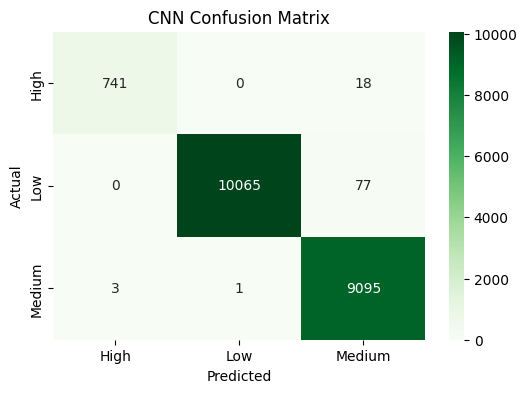

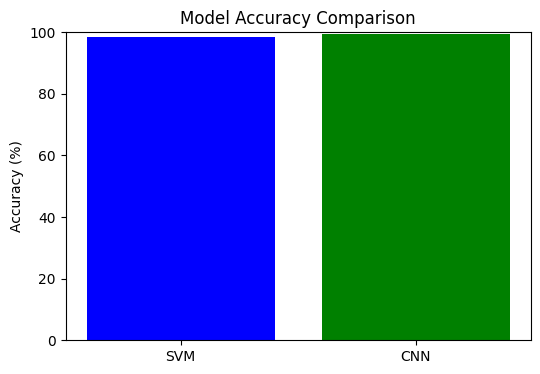

In [1]:
# AutoCogMetrics: Cognitive State Classification Framework

# ------------------ Import Libraries ------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

# ------------------ Load Dataset ------------------
df = pd.read_excel("/content/cognitive_metrics.xlsx")
print("First 5 rows of dataset:")
print(df.head())

# ------------------ Basic Dataset Info ------------------
print("\nDataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())

# ------------------ EDA Visualizations ------------------
# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x="Cognitive_Level", data=df, palette="viridis")
plt.title("Distribution of Cognitive Levels")
plt.show()

# Correlation heatmap (only numeric columns)
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# ------------------ Data Preprocessing ------------------
# Encode target labels
le = LabelEncoder()
df['Cognitive_Level'] = le.fit_transform(df['Cognitive_Level'])

# Separate features and target
X = df.drop('Cognitive_Level', axis=1).values
y = df['Cognitive_Level'].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ------------------ SVM Model ------------------
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# SVM Performance Metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"SVM Precision: {svm_precision:.4f}")
print(f"SVM Recall: {svm_recall:.4f}")
print(f"SVM F1-score: {svm_f1:.4f}")

# Confusion Matrix for SVM
plt.figure(figsize=(6, 4))
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ------------------ CNN Model ------------------
# Reshape data for CNN
X_train_cnn = X_train[..., np.newaxis]
X_test_cnn = X_test[..., np.newaxis]

cnn_model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# CNN Performance Metrics
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
y_pred_cnn_probs = cnn_model.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_cnn_probs, axis=1)

cnn_precision = precision_score(y_test, y_pred_cnn, average='weighted')
cnn_recall = recall_score(y_test, y_pred_cnn, average='weighted')
cnn_f1 = f1_score(y_test, y_pred_cnn, average='weighted')

print("\nCNN Classification Report:")
print(classification_report(y_test, y_pred_cnn))
print(f"CNN Accuracy: {cnn_accuracy:.4f}")
print(f"CNN Precision: {cnn_precision:.4f}")
print(f"CNN Recall: {cnn_recall:.4f}")
print(f"CNN F1-score: {cnn_f1:.4f}")

# Confusion Matrix for CNN
plt.figure(figsize=(6, 4))
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap="Greens", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ------------------ Accuracy Comparison ------------------
plt.figure(figsize=(6, 4))
plt.bar(['SVM', 'CNN'], [svm_accuracy*100, cnn_accuracy*100], color=['blue', 'green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.show()
